In [19]:
import tweepy
import pandas as pd     
import numpy as np      
import csv
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
consumer_key='A2ZAyYlxuLohYzayM3FeUL7ky'
consumer_secret='DkklDT49vjVJDubyMC1eEFDAOuZIQ6SJPWZVmQMxW19ylNRdvQ'
access_token='1092822084286201857-EzS9rPdVxLeIwFVH2oiwxPdEt4J9ol' 
access_token_secret='d3gdLxxpoMJ11jOkwP6zNZvue117V7Hv43nYJxC9F2WGK' 

In [21]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [22]:
extractor = twitter_setup()


tweets = extractor.user_timeline(screen_name="modi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))


print("5 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Number of tweets extracted: 199.

5 recent tweets:

RT @rajnathsingh: The Army has a long tradition of exemplary valour &amp; supreme sacrifice. I bow to all soldiers who sacrificed their lives f…

RT @arunjaitley: Demonetisation – A look back at the last two months https://t.co/m5o4ob6MRo

RT @arunjaitley: Legal tender cancellation of currency has some transient problems but we planned to handle it efficiently.No citizen will…

RT @DeshGujarat: "PM clearly believes that he doesn't want to run lackluster,routine govt like 2004-14 and sign files, but wants to make im…

RT @rajnathsingh: It is indeed courageous and bold decision taken by the Prime Minister.India's fight against corruption &amp; terrorism will n…

RT @rajnathsingh: Congratulations to Army &amp; Security Forces on successful operation at Pampore.Our forces are extremely capable to counter…

RT @SushmaSwaraj: Our daughter Judith D'Souza is back with us. https://t.co/R6fvGxi4lI

RT @MrsGandhi: Thank you @Gen_VKSingh for reas

In [23]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])  #we are taking the text of tweet in tweets

display(data.head(10))

,Tweets
0,RT @rajnathsingh: The Army has a long traditio...
1,RT @arunjaitley: Demonetisation – A look back ...
2,RT @arunjaitley: Legal tender cancellation of ...
3,"RT @DeshGujarat: ""PM clearly believes that he ..."
4,RT @rajnathsingh: It is indeed courageous and ...
5,RT @rajnathsingh: Congratulations to Army &amp...
6,RT @SushmaSwaraj: Our daughter Judith D'Souza ...
7,RT @MrsGandhi: Thank you @Gen_VKSingh for reas...
8,"RT @PiyushGoyal: Rs 43,000 crore undisclosed i..."
9,RT @AmitShah: India grows at 7.9% despite weak...


In [24]:
print(dir(tweets[0]))    

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [25]:
print(tweets[0].id) 
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)
print(tweets[0].text)

820598930908082176
2017-01-15 11:50:05
Twitter for Android
0
607
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'rajnathsingh', 'name': 'Rajnath Singh', 'id': 1346439824, 'id_str': '1346439824', 'indices': [3, 16]}], 'urls': []}
RT @rajnathsingh: The Army has a long tradition of exemplary valour &amp; supreme sacrifice. I bow to all soldiers who sacrificed their lives f…


In [26]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [27]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @rajnathsingh: The Army has a long traditio...,144,820598930908082176,2017-01-15 11:50:05,Twitter for Android,0,607
1,RT @arunjaitley: Demonetisation – A look back ...,92,818366503422754816,2017-01-09 07:59:13,Twitter for Android,0,721
2,RT @arunjaitley: Legal tender cancellation of ...,139,796786110215032832,2016-11-10 18:46:26,Twitter for Android,0,795
3,"RT @DeshGujarat: ""PM clearly believes that he ...",140,796785849857818624,2016-11-10 18:45:24,Twitter for Android,0,116
4,RT @rajnathsingh: It is indeed courageous and ...,144,796785698925780992,2016-11-10 18:44:48,Twitter for Android,0,2290
5,RT @rajnathsingh: Congratulations to Army &amp...,143,786374011416555520,2016-10-13 01:12:29,Twitter for Android,0,1869
6,RT @SushmaSwaraj: Our daughter Judith D'Souza ...,86,756902448329920512,2016-07-23 17:23:00,Twitter for Android,0,1644
7,RT @MrsGandhi: Thank you @Gen_VKSingh for reas...,140,754747909246038017,2016-07-17 18:41:38,Twitter for Android,0,315
8,"RT @PiyushGoyal: Rs 43,000 crore undisclosed i...",140,749424063722889216,2016-07-03 02:06:35,Twitter for Android,0,227
9,RT @AmitShah: India grows at 7.9% despite weak...,143,738192187880394754,2016-06-02 02:15:07,Twitter for Android,0,985


In [28]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
India is now the World's fastest growing economy. #2YearsOfModiGovt https://t.co/DVLHbIVdDs
Number of likes: 389
91 characters.

The tweet with more retweets is: 
RT @narendramodi: India has won! भारत की विजय। अच्छे दिन आने वाले हैं।
Number of retweets: 107693
70 characters.



In [29]:
csvFile = open('modi.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
data.to_csv('modi.csv')

In [30]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

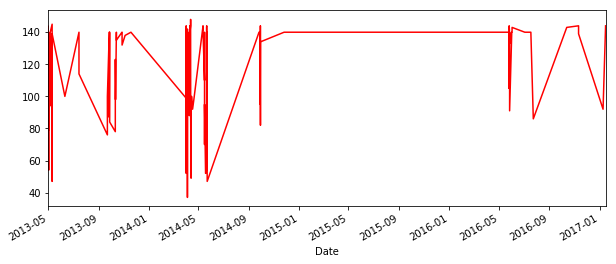

In [31]:
# Lenghts along time:
tlen.plot(figsize=(10,4), color='r');

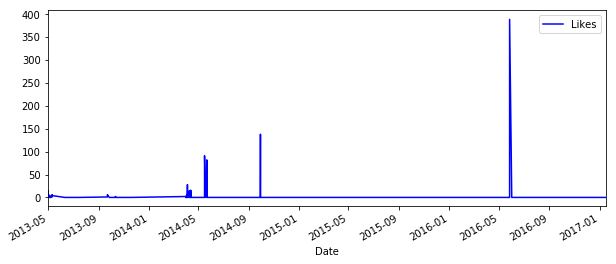

In [32]:
tfav.plot(figsize=(10,4),color='b',label="Likes", legend=True)

In [33]:
#obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web Client
* Twitter for iPhone
* Twitter for Websites
* iOS
* Buffer


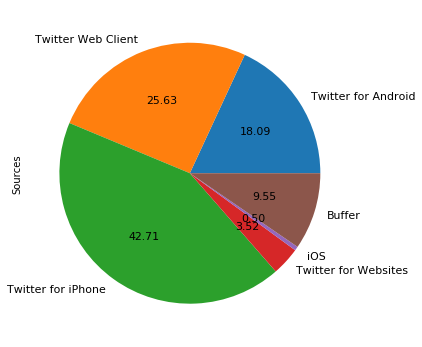

In [34]:
#create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [35]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [36]:
#print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

NameError: name 'pos_tweets' is not defined